In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import random
import csv
from collections import defaultdict
from math import e
from math import pi
import requests
import re

In [2]:
#loading features
feature1= pd.read_csv('Pigs_49651_960_540_500f_DataH10.csv', header=None)
feature2= pd.read_csv('Pigs_49651_960_540_500f_DataHOG.csv', header=None)
feature3= pd.read_csv('Pigs_49651_960_540_500f_DataLBP.csv', header=None)
feature4= pd.read_csv('Pigs_49651_960_540_500f_DataRGB.csv', header= None)

In [3]:
feature1.describe()

,0,1,2,3,4,5,6,7,8,9
count,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000
mean,0.771133,0.079231,0.003612,0.002089,0.005220,0.018733,0.060850,0.015647,0.010467,0.033017
std,0.160631,0.054420,0.003979,0.002486,0.011169,0.032673,0.099758,0.018354,0.009620,0.029963
min,0.167092,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.693320,0.039860,0.000957,0.000319,0.000319,0.000957,0.002551,0.002312,0.002870,0.010842
50%,0.817921,0.065370,0.002551,0.001276,0.001913,0.004783,0.014031,0.008929,0.007653,0.025510
75%,0.890306,0.107143,0.005102,0.002870,0.006059,0.018176,0.060826,0.023278,0.015944,0.045918
max,1.000000,0.443240,0.062181,0.021046,0.196110,0.261798,0.560587,0.149872,0.066645,0.333546


In [4]:
feature2.describe()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
count,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,...,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5.922000e+03,5922.000000,5922.000000,5922.000000,5922.000000
mean,0.383444,0.295668,0.303983,0.294271,0.382408,0.270575,0.245864,0.239082,0.262741,0.366267,...,0.308067,0.390904,0.243680,0.237158,0.244740,3.835744e-01,0.284050,0.288968,0.295059,0.292214
std,0.099655,0.151092,0.149988,0.150869,0.101694,0.151556,0.146015,0.148855,0.160265,0.109639,...,0.156865,0.093814,0.156181,0.156045,0.157325,1.061666e-01,0.156377,0.148351,0.149267,0.160098
min,0.009926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014590,...,0.000000,0.030498,0.000000,0.000000,0.000000,7.575699e-16,0.000000,0.000000,0.000000,0.000000
25%,0.356603,0.175496,0.189003,0.179385,0.357984,0.139149,0.109536,0.103568,0.121124,0.332641,...,0.182218,0.360942,0.096704,0.089338,0.094907,3.571727e-01,0.148535,0.166072,0.171763,0.154468
50%,0.388886,0.354373,0.361313,0.351389,0.389417,0.315216,0.262009,0.249689,0.287989,0.382515,...,0.355612,0.392878,0.257360,0.249087,0.269597,3.909145e-01,0.342212,0.348693,0.348946,0.347006
75%,0.428312,0.402914,0.407137,0.400311,0.427691,0.383826,0.373551,0.370620,0.383650,0.426135,...,0.417053,0.434214,0.376189,0.374700,0.376217,4.312430e-01,0.396150,0.397728,0.401536,0.402663
max,0.919145,0.744529,0.836376,0.696470,0.966023,0.701966,0.650245,0.642668,0.706082,0.980939,...,0.695339,0.820130,0.686828,0.651130,0.685291,9.714822e-01,0.706034,0.822440,0.657022,0.772374


In [5]:
feature3.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,...,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000
mean,0.314006,0.038863,0.012239,0.027509,0.003310,0.007499,0.031488,0.000951,0.000104,0.003868,...,0.003081,0.000091,0.001383,0.044145,0.007417,0.002595,0.033742,0.010985,0.040660,0.216263
std,0.044353,0.011914,0.003806,0.008154,0.001339,0.002377,0.007989,0.000680,0.000189,0.001369,...,0.001156,0.000176,0.000857,0.013165,0.002458,0.001165,0.012907,0.003859,0.015153,0.034675
min,0.188776,0.011798,0.003189,0.009566,0.000000,0.001594,0.012117,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.006696,0.000957,0.000000,0.006378,0.002870,0.007653,0.109056
25%,0.287309,0.030612,0.009566,0.022003,0.002232,0.005740,0.025829,0.000319,0.000000,0.002870,...,0.002232,0.000000,0.000638,0.034758,0.005740,0.001913,0.025510,0.008291,0.030612,0.189732
50%,0.313457,0.036990,0.011798,0.026148,0.003189,0.007334,0.030612,0.000957,0.000000,0.003827,...,0.002870,0.000000,0.001276,0.042411,0.007334,0.002551,0.031569,0.010523,0.038584,0.213329
75%,0.338329,0.045281,0.014349,0.031569,0.004145,0.008929,0.036033,0.001276,0.000319,0.004783,...,0.003827,0.000000,0.001913,0.051658,0.008929,0.003189,0.039860,0.013393,0.047513,0.240753
max,0.507972,0.123406,0.029337,0.080995,0.010523,0.018814,0.065689,0.005102,0.001276,0.009885,...,0.007653,0.001594,0.007972,0.095026,0.022640,0.010842,0.088329,0.031569,0.107143,0.342156


In [6]:
feature4.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,...,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000
mean,0.001861,0.001598,0.001368,0.000794,0.000686,0.000573,0.002260,0.001954,0.001662,0.000789,...,0.001337,0.000741,0.000645,0.000536,0.002055,0.001744,0.001447,0.000792,0.000689,0.000573
std,0.000620,0.000518,0.000420,0.000222,0.000193,0.000163,0.000706,0.000587,0.000475,0.000245,...,0.000493,0.000280,0.000237,0.000199,0.000724,0.000604,0.000476,0.000254,0.000215,0.000178
min,0.000316,0.000301,0.000308,0.000016,0.000014,0.000013,0.000289,0.000313,0.000368,0.000021,...,0.000337,0.000064,0.000077,0.000090,0.000282,0.000295,0.000283,0.000065,0.000053,0.000051
25%,0.001389,0.001217,0.001067,0.000668,0.000565,0.000465,0.001833,0.001581,0.001347,0.000644,...,0.000954,0.000540,0.000474,0.000387,0.001511,0.001284,0.001096,0.000632,0.000554,0.000447
50%,0.001896,0.001597,0.001344,0.000822,0.000705,0.000581,0.002312,0.002012,0.001709,0.000803,...,0.001332,0.000749,0.000654,0.000541,0.002058,0.001715,0.001399,0.000807,0.000699,0.000582
75%,0.002314,0.001967,0.001666,0.000951,0.000826,0.000690,0.002795,0.002396,0.001997,0.000953,...,0.001671,0.000943,0.000821,0.000685,0.002584,0.002173,0.001786,0.000961,0.000841,0.000699
max,0.003481,0.003076,0.002627,0.001430,0.001241,0.001178,0.003695,0.003481,0.003123,0.001389,...,0.003140,0.001473,0.001410,0.001312,0.003793,0.003605,0.003400,0.001563,0.001286,0.001133


In [7]:
#looking at the min/max values of the dataset, the values do not vary significantly meaning
#not implementing normalization/standardization to prevent over-fitting

In [8]:
#load target variable file
pig_labels= pd.read_csv('Pigs_49651_960_540_500f_Labels.csv', header=None)

## 1. Implementing a Prior classifier without using a Python library 
Taking Naive Bayes as the example because it makes a new observation to the class with the highest prior probability. In other words, it assumes that the class probabilities are known in advance, and uses this information to make predictions. This prior probabilities are typically estimated from the training data, or based on some other external knowledge.

In [9]:
class NaiveBayesClassifier:
    
    def __init__(self):
        self.class_priors = None
        self.conditional_probs = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        
        # Compute class priors
        self.class_priors = np.zeros(n_classes)
        for i, c in enumerate(self.classes):
            self.class_priors[i] = np.sum(y == c) / n_samples
        
        # Compute conditional probabilities
        self.conditional_probs = {}
        for i in range(n_features):
            feature_values = np.unique(X[:, i])
            for j, c in enumerate(self.classes):
                class_data = X[y == c, :]
                self.conditional_probs[(i, c)] = {}
                for value in feature_values:
                    self.conditional_probs[(i, c)][value] = (np.sum(class_data[:, i] == value) + 1) / (len(class_data) + len(feature_values))
    
    def predict(self, X):
        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)
        for i in range(n_samples):
            joint_probs = np.zeros(len(self.classes))
            for j, c in enumerate(self.classes):
                # Compute the joint probability of the features and the class
                joint_prob = np.log(self.class_priors[j])
                for k in range(X.shape[1]):
                    if (k, c) in self.conditional_probs:
                        if X[i, k] in self.conditional_probs[(k, c)]:
                            joint_prob += np.log(self.conditional_probs[(k, c)][X[i, k]])
                        else:
                            # Handle unseen feature values by assigning a small probability
                            joint_prob += np.log(1 / (len(self.conditional_probs[(k, c)]) + 1))
                    else:
                        # Handle unseen features by assigning a small probability
                        joint_prob += np.log(1 / (X[:, k].max() + 1))
                joint_probs[j] = joint_prob
            # Assign the class with the highest joint probability as the predicted class
            y_pred[i] = self.classes[np.argmax(joint_probs)]
        return y_pred

In [11]:
#creating a dataset containing target and feature variables
pig_dataset= pd.concat([feature1, feature2, feature3, feature4, pig_labels],axis=1)
pig_dataset.shape

(5922, 556)

In [12]:
#creating training and testing data according to sizes given: 2710 3212
data_train= pig_dataset.iloc[:2710, :]
data_test=  pig_dataset.iloc[:3212, :]

In [15]:
#creating training data for features
#as NB without python lirary cannot directly compute both dataframe and numpy array 
x= data_train.iloc[:,:-1].to_numpy()
x.shape

(2710, 555)

In [14]:
#creating training data for target variable
y = data_train.iloc[:,-1].to_numpy()
y.shape

(2710,)

In [16]:
#creating testing data for target variable
y_test= data_test.iloc[:, -1]
y_test.shape

(3212,)

In [17]:
#creating testing data for features 
x_test= data_test.iloc[:, :-1].to_numpy()
x_test.shape

(3212, 555)

In [18]:
nb =NaiveBayesClassifier()

In [19]:
# Train the classifier on the dataset
nb.fit(x, y)

In [20]:
# Make predictions on the same dataset
y_pred = nb.predict(x_test)

In [21]:
# Compute the accuracy of the classifier
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8891656288916563


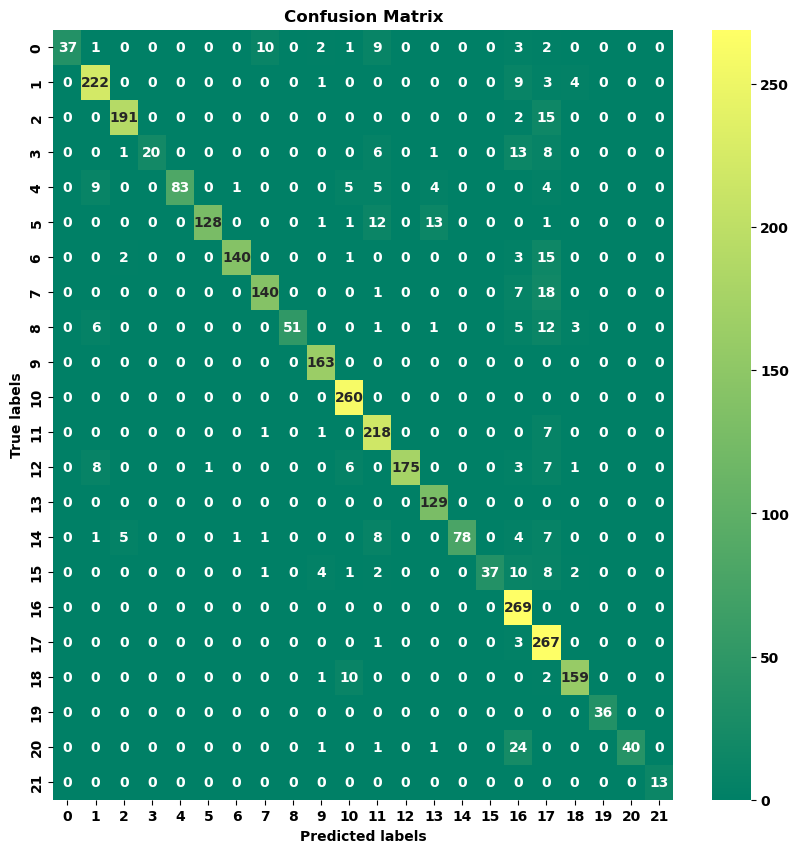

In [83]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
fig, ax= plt.subplots(1,1, figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='summer', ax=ax)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig("nb_pig_confusion_matrix2.png")
plt.show()

## 2. Bagging Classifier

In [23]:
pig_features = pd.concat([feature1, feature2, feature3, feature4],axis=1)

In [25]:
pig_labels= pig_labels.to_numpy()

In [72]:
#spliting dataframe into given training and testing sizes
training= 2710
testing=  3212
test_size = testing / (training + testing)
test_size 

0.5423843296183721

In [27]:
# X is the input features and y is the target variable
X_train, X_test, Y_train, Y_test = train_test_split(pig_features, pig_labels, test_size=test_size, random_state=42)

# test_size specifies the proportion of the dataset to include in the test split
# random_state ensures that the same random split is generated each time the code is run

In [28]:
# create the base classifier
base_classifier = DecisionTreeClassifier()

# create the ensemble classifier using bagging
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, 
                                        n_estimators=10, 
                                        random_state=42)

# fit the model on training data
bagging_classifier.fit(X_train, Y_train)

# predict the class labels for test data
bagging_pred = bagging_classifier.predict(X_test)

# evaluate the performance of the classifier
bagging_acc= accuracy_score(Y_test, bagging_pred)
print("Bagging Accuracy: {:.2f}".format(bagging_acc))

Bagging Accuracy: 0.82


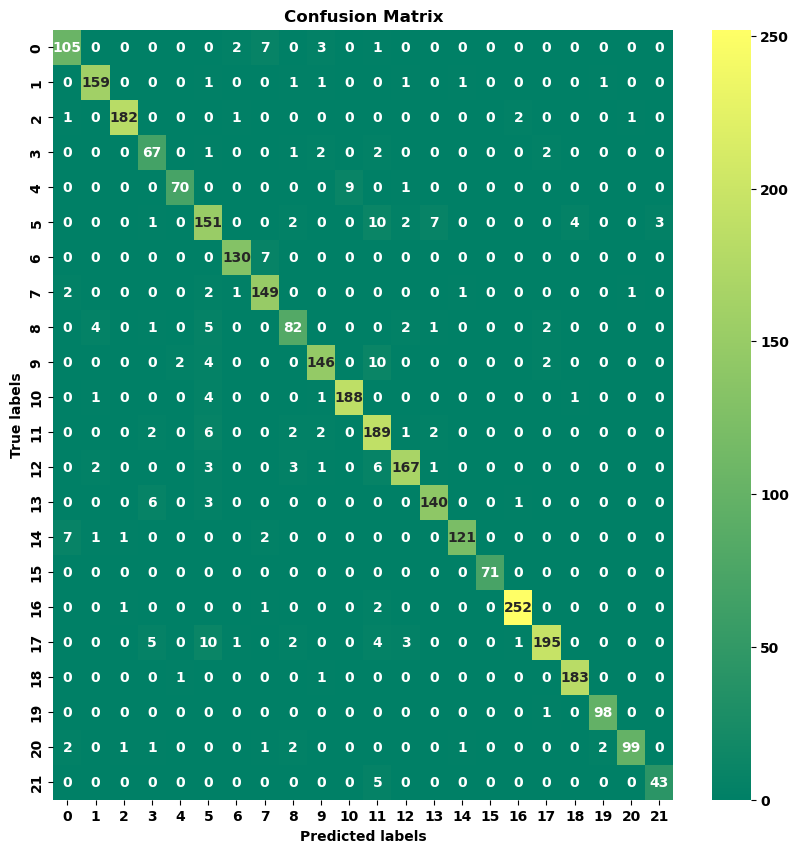

In [82]:
# Create a confusion matrix
cm_bag = confusion_matrix(Y_test, bagging_pred)

# Create a heatmap of the confusion matrix
fig, ax= plt.subplots(1,1, figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='summer', ax=ax)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig("bagging_pig_confusion_matrix3.png")
plt.show()

## 3. Linear Discriminant Analysis Classifier

In [38]:
# Create an instance of the LDA model
LDA = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
LDA.fit(X_train, Y_train)

# Predict the target values for the testing data
LDA_pred = LDA.predict(X_test)

#evaluate the performance of the classifier
LDA_acc = accuracy_score(Y_test, LDA_pred)
print("LDA Accuracy: {:.2f}".format(LDA_acc))

LDA Accuracy: 0.93


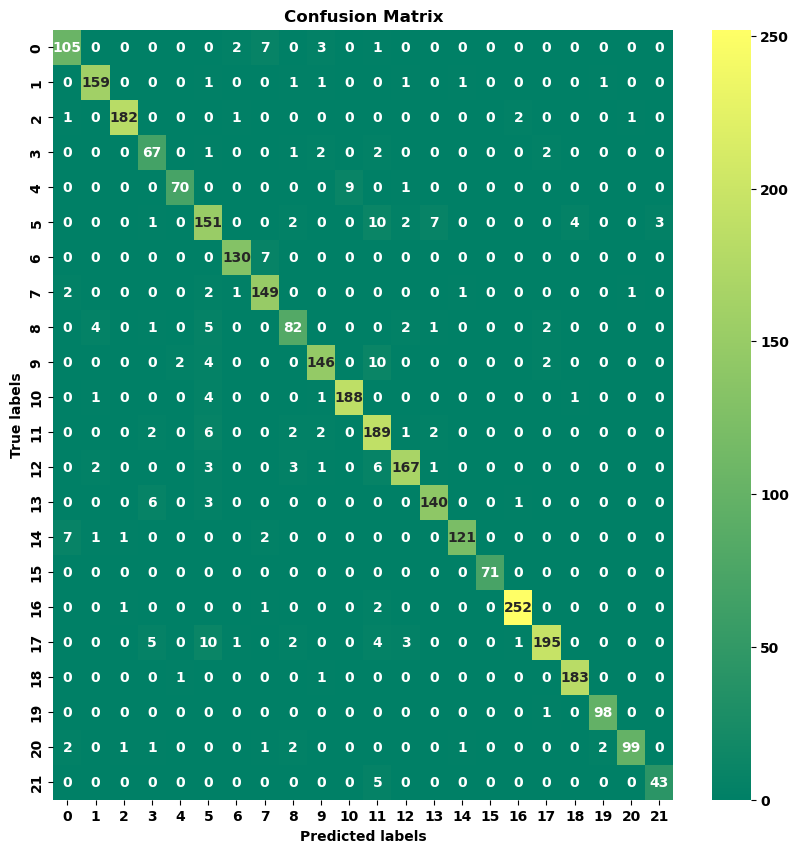

In [81]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, LDA_pred)

# Create a heatmap of the confusion matrix
fig, ax= plt.subplots(1,1, figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='summer', ax=ax)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("LDA_pig_confusion_matrix.png")

plt.show()

## 4. KNeighbors Classifier

In [44]:
# Create an instance of the KNN model with k=5
KNN = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the training data
KNN.fit(X_train, Y_train)

# Predict the target values for the testing data
KNN_pred = KNN.predict(X_test)

#evaluate the performance of the classifier
KNN_acc = accuracy_score(Y_test, KNN_pred)
print("KNN Accuracy: {:.2f}".format(KNN_acc))

KNN Accuracy: 0.91


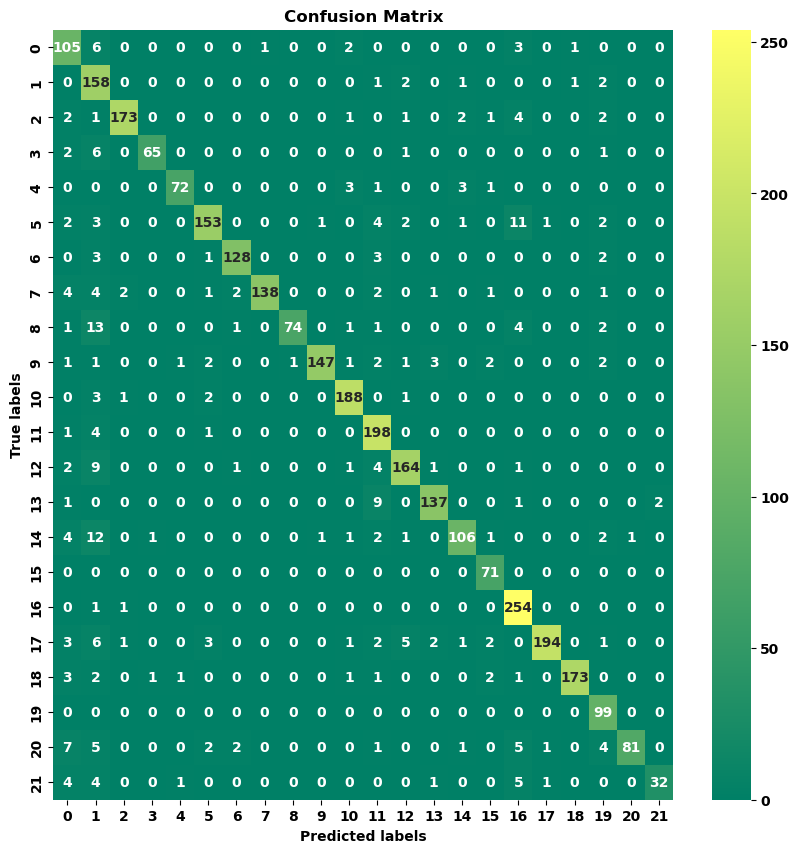

In [80]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, KNN_pred)

# Create a heatmap of the confusion matrix
fig, ax= plt.subplots(1,1, figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='summer', ax=ax)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("KNN_pig_confusion_matrix.png")
plt.show()

## 5. Decision Tree Classifier

In [53]:
# Create an instance of the Decision Tree model with max depth of 3
Tree = DecisionTreeClassifier(max_depth=20)

# Fit the Decision Tree model to the training data
Tree.fit(X_train, Y_train)

# Predict the target values for the testing data
Tree_pred = Tree.predict(X_test)

#evaluate the performance of the classifier
Tree_acc = accuracy_score(Y_test, Tree_pred)
print("Decision Tree Accuracy: {:.2f}".format(Tree_acc))

Decision Tree Accuracy: 0.65


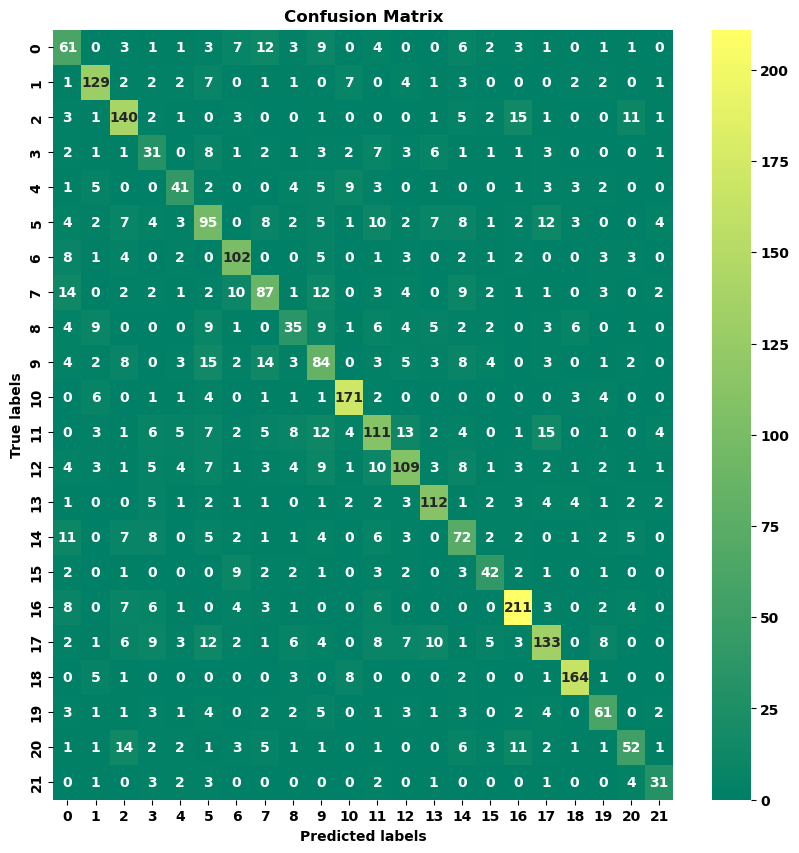

In [79]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, Tree_pred)

# Create a heatmap of the confusion matrix
fig, ax= plt.subplots(1,1, figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='summer', ax=ax)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("Tree_pig_confusion_matrix.png")
plt.show()

## 6. Random Forest Classifier

In [58]:
# Create an instance of the Random Forest model with 100 trees
RFC = RandomForestClassifier(n_estimators=100)

# Fit the Random Forest model to the training data
RFC.fit(X_train, Y_train)

# Predict the target values for the testing data
RFC_pred = RFC.predict(X_test)

#evaluate the performance of the classifier
RFC_acc = accuracy_score(Y_test, RFC_pred)
print("Random Forest Accuracy: {:.2f}".format(RFC_acc))

Random Forest Accuracy: 0.95


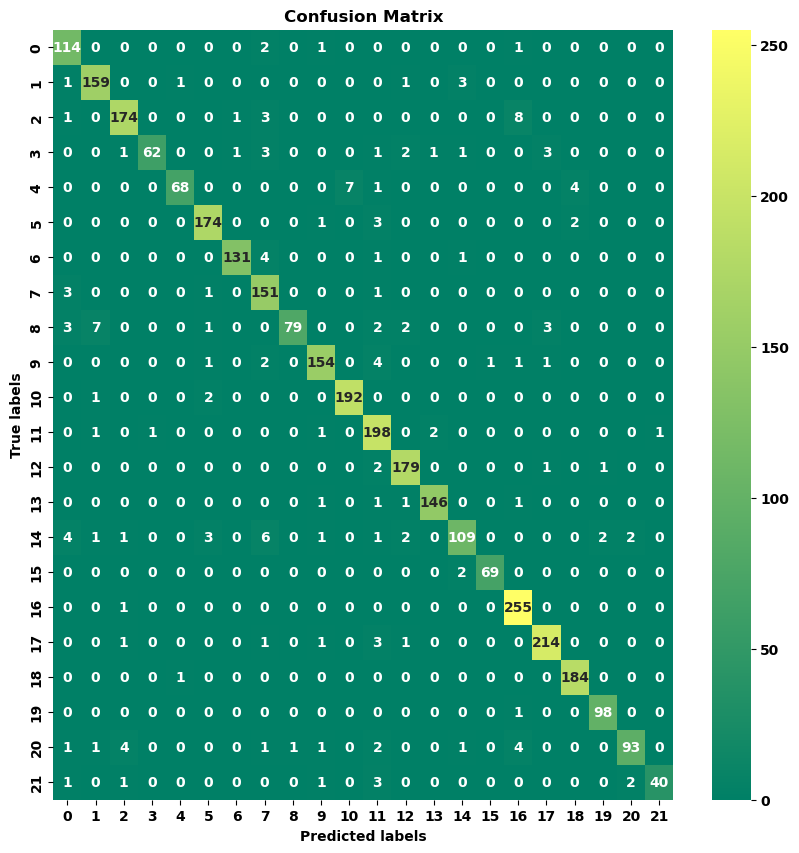

In [78]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, RFC_pred)

# Create a heatmap of the confusion matrix
fig, ax= plt.subplots(1,1, figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='summer', ax=ax)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("rfc_pig_confusion_matrix.png")
plt.show()

## 7. SVM model

In [65]:
# Create an instance of the SVM model
svm = SVC(kernel='linear', C=1)

# Fit the SVM model to the training data
svm.fit(X_train, Y_train)

# Predict the target values for the testing data
svm_pred = svm.predict(X_test)

#evaluate the performance of the classifier
svm_acc = accuracy_score(Y_test, svm_pred)
print("SVM Accuracy: {:.2f}".format(svm_acc))

SVM Accuracy: 0.86


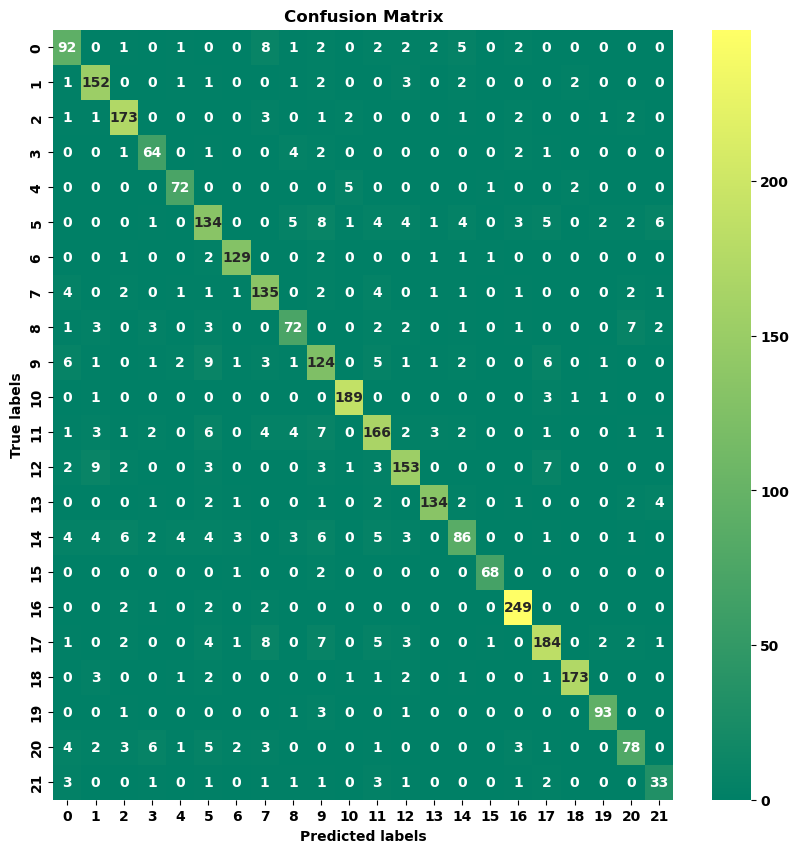

In [77]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, svm_pred)

# Create a heatmap of the confusion matrix
fig, ax= plt.subplots(1,1, figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='summer', ax=ax)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("svm_pig_confusion_matrix.png")
plt.show()

In [69]:
# Create a dictionary of the accuracy scores
results = {'Classifier': ['Largest prior', 'Decision Tree', 'KNN', 'Bagging', 'SVM', 'LDA', 'Random Forest'],
           'Accuracy': [accuracy, Tree_acc, KNN_acc, bagging_acc, svm_acc, LDA_acc, RFC_acc]}

# Create a Pandas dataframe from the dictionary
df_koi_results = pd.DataFrame(results)

# Sort the dataframe by accuracy in descending order
df_koi_results = df_koi_results.sort_values(by='Accuracy', ascending=False)

# Print the dataframe
df_koi_results

,Classifier,Accuracy
6,Random Forest,0.947385
5,LDA,0.929950
2,KNN,0.905978
0,Largest prior,0.889166
4,SVM,0.857098
3,Bagging,0.823163
1,Decision Tree,0.645704


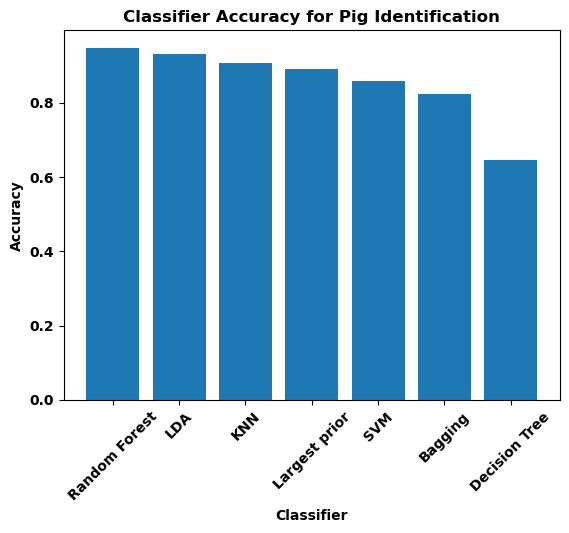

In [71]:
# Create a bar chart of the accuracy scores
plt.bar(df_koi_results['Classifier'], df_koi_results['Accuracy'])
plt.xticks(rotation=45)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy for Pig Identification')

plt.savefig("barchart showing pig Classifier Accuracy.png")
plt.show()